In [1]:
#-*-coding:UTF-8-*-
import string

#list of consonants 
consonants = ["k","kh","g","gh","ch","Ch","j","jh","T","Th","D","Dh","N","t","th","d","dh","n","p","ph","b","bh","m","y",\
                    "r","l","v","w","sh","Sh","s","h"]

#list of vowels 
vowels = ["a","A","i","I","u","U","E","ai","O","au","RRi","RRI","LLi","LLI","M","H","OM"]

#list of consonant_cluster
consonants_cluster = ["xa","tra","GYa","shra"]

#list of consonants with nuqta 
consonants_nuqta = ["qa","Kha","Ga","za","fa","Ra","Rha"]

#list of half_forms 
half_forms = ["tta" ,"lkA","svA","sthya","spa","chcha","kta","nhEM","nhOM","sya","mba","ndhI","kTa","bla","bbE","sthi",\
                    "tyu","chchA","ntu","lga","shki","stE","sta","jyA","ddha","vya","kka","stA","bra","pra","nma","rva"]
#list of punctuations 
punctuations = [".","\n"]


#dictionary mapping consonants to the hindi characters 
consonant_mapping = {"k":'क',"kh":'ख',"g":'ग',"gh":'घ',"ch":'च',"Ch":'छ',"j":'ज',"jh":'झ',"T":'ट',"Th":'ठ',"D":'ड',"Dh":'ढ',"N":'ण',\
            "t":'त',"th":'थ',"d":'द',"dh":'ध',"n":'न',"p":'प',"ph":'फ',"b":'ब',"bh":'भ',"m":'म',"y":'य',"r":'र',"l":'ल',\
                "v":'व',"w":'व',"sh":'श',"Sh":'ष',"s":'स',"h":'ह'}

#dictionary mapping vowels to the hindi characters 
vowels_mapping = {"a":'अ',"A":'आ',"i":'इ',"I":'ई',"u":'उ',"U":'ऊ',"E":'ए',"ai":'ऐ',"O":'ओ',"au":'औ',"RRi":'ऋ',\
                    "RRI":'ॠ',"LLi":'ऌ',"LLI":'ॡ',"M":'अं',"H":'अः',"OM":'ॐ'}



#dictionary mapping consonant clusters to the hindi characters 
cc_mapping={"xa":'क्ष',"tra":'त्र',"GYa":'ज्ञ',"shra":'श्र'}

#dictionary mapping half forms to the hindi characters 
halfforms_mapping={"tta":'त्त' ,"lkA":'ल्का ',"svA":'स्वा',"sthya":'स्थ्य',"spa":'स्प',"chcha":'च्च',"kta":'क्त',"nhEM":'न्हें',"nhOM":'न्हों',\
                        "sya":'स्य',"mba":'म्ब',"ndhI":'न्धी',"kTa":'क्ट',"bla":'ब्ल',"bbE":'ब्बे',"sthi":'स्थि',"tyu":'त्यु',"chchA":'च्चा',\
                    "ntu":'न्तु',"lga":'ल्ग',"shki":'श्कि',"stE":'स्ते',"sta":'स्त',"jyA":'ज्या',"ddha":'द्ध',"vya":'व्य',"kka":'क्क',"stA":'स्ता',\
                    "bra":'ब्र',"pra":'प्र',"nma":'न्म',"rva":'र्व'}

#dictionary mapping consonant with nuqtas to the hindi characters 
conso_nuqta_mapping ={"qa":'क़',"Kha":'ख़',"Ga":'ग़',"za":'ज़',"fa":'फ़',"Ra":'ड़',"Rha":'ढ़'}

hindi_consonant=['क','ख','ग','घ','च','छ','ज','झ','ट','ठ','ड','ढ','ण',\
            'त','थ','द','ध','न','प','फ','ब','भ','म','य','र','ल',\
                'व','श','ष','स','ह']
#mapping of vowels when they are used with consonants 
vowels_translation = {'अ':'','आ':'ा','इ':'ि','ई':'ी','उ':'ु','ऊ':'ू','ए':'े','ऐ':'ै','ओ':'ो','औ':'ौ','ऋ':'ृ',\
                    'ॠ':'ॄ','ऌ':'ॢ','ॡ':'ॣ','अं':'ं','अः':'ः','ॐ':''}

In [2]:
#remove punctuation from the text
def remove_punctuation(words):

    words_processed=[]
    for word in words:
        no_punct = ""
        for char in word:
            if char not in punctuations:
                no_punct = no_punct + char
        words_processed.append(no_punct)
    return words_processed

#returns true if given char is in the specified group
def check(group,char):
    if char in group:
        return True
    else:
        return False

#returns hindi character for specified letter in english 
def find_mapping(mapping_dict,letter):
    return mapping_dict[letter]


#returns closest hindi mapping along with type of the hindi character 
def get_letters(word):

    type = ''
    if check(vowels,word):
        hindi = find_mapping(vowels_mapping,word)
        type = 'vowel'
        return True,hindi,type

    elif check(consonants,word):
        #print ("Consonants:  "+word)
        #print find_mapping(consonant_mapping, word)
        hindi = find_mapping(consonant_mapping,word)
        type = 'consonant'
        return True,hindi,type
    elif check(consonants_cluster,word):
        hindi = find_mapping(cc_mapping,word)
        return True,hindi,type
    elif check(consonants_nuqta,word):
        hindi = find_mapping(conso_nuqta_mapping,word)
        return True,hindi,type
    elif check(half_forms,word):
        hindi = find_mapping(halfforms_mapping,word)
        return True,hindi,type
    elif word in string.punctuation and word !="\"":
        hindi = word
        return True,hindi,type
    else:
        hindi=""
        return False,hindi,type


def process(word,is_english):
    #results={}


    current_index = 0
    last_index = len(word)
    result =''
    meaning = ''
    previous_previous_type=''
    previous_type = ''
    current_type=''
    previous_char = ''
    previous_previous_char=''
    
    if is_english:
        result = word
        meaning = word
        return result,meaning
    else:
        
        while(current_index != len(word) and last_index>0):

            is_found,hindi,current_type = get_letters(word[current_index:last_index])
            if(is_found and hindi != ""):
                result = result + word[current_index:last_index]

                if current_type == 'vowel':
                    if previous_type == 'consonant':
                        meaning = meaning+vowels_translation[hindi]
                        #previous_type = ''
                    elif previous_type == 'vowel':
                        meaning = meaning+vowels_translation[hindi]
                        #previous_type = ''
                        
                    else:
                        meaning = meaning+hindi
                        #previous_type =''
                else:
                    previous_type = current_type
                    meaning = meaning+hindi


                current_index = last_index
                last_index = len(word)
            else:
                last_index = last_index-1
        return result,meaning


#if hindi word is made up of consonants followed by vowels, then it replaces the consonant and vowel
#with appropriate mapping 
def process_hindi_words(word):
    
    i = 0
    j= 1
    while(j <= len(word)):
        if(word[i] in hindi_consonant and word[j] in vowels_translation.keys()):
            char = word[i]+vowels_translation[word[j]]
            print char
            i = i + 2
            j = j + 2
        else:
            i = i+2
            j=j+2

            
#read from hindi narratives and write the translation into the results file             
def process_data(entry):
    words = remove_punctuation(entry.split(" "))

    result = ''
    is_english = False
    for word in words:

        if len(word)>0:
            if word[0]=="\"" and word[len(word)-1]=="\"":
                is_english = True
                item,trans = process(word,is_english)
                is_english = False  
            elif word[0]=="\"":
                is_english = True
                item,trans = process(word,is_english)
            elif word[len(word)-1]=="\"":
                item,trans = process(word,is_english)
                is_english = False
            else:
                item,trans = process(word,is_english)
        #print item+":"+trans
            result = result+" "+trans
    return (result)


In [1]:
# -*- coding: utf-8 -*-
# Convert the csv of the translated narratives to an xml tree

import sys
from lxml import etree
import argparse
import calendar
import csv
import re
import subprocess


In [4]:
data=[]
total_char=0
tree = etree.parse('../../../../data/mds+rct/all_adult_cat_second.xml')
for e in tree.iter():
    if e.tag == 'narrative':
        data.append(e.text)

for n in data:
        total_char += len(n)
print(total_char)
    
    


1325434


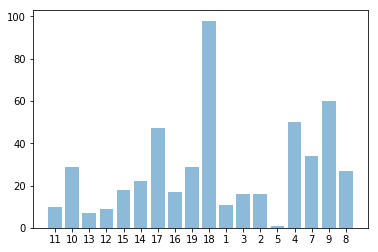

In [14]:
import matplotlib.pyplot as plt
import numpy as np

data={}
tree = etree.parse('../data/mds+rct/all_adult_cat.xml')
for e in tree.iter():
    if e.tag == 'cghr_cat':
        if e.text in data:
                   data[e.text] += 1
        else:
            data[e.text]=1
x = []
y=[]
for k,v in data.items() :
    x.append(int(k))
    y.append(v)
y_pos = np.arange(len(x))
plt.bar(y_pos,y,align = 'center',alpha=0.5)
plt.xticks(y_pos, x)
plt.show()
                   
                   
        

In [4]:
#XML Root Information
adult_root = etree.Element("root")
adult_tag = "Adult_Anonymous"
id_tag = "MG_ID"
narr_tag_hindi = "narrative"
narr_tag_eng= "original_narr"
code_tag = "Final_code"
p1_keywords_tag = "keywords_p1"
p1_icd_tag = "icd_p1"
p2_keywords_tag = "keywords_p2"
p2_icd_tag = "icd_p2"

#CSV Parser Codes
id_name = 'id'
narrative = 'transcribed_mds_narrative'
final_code = 'final_code'
p1_keywords = 'p1_keywords'
p1_icd = 'p1_icd'
p2_keywords = 'p2_keywords'
p2_icd = 'p2_icd'

In [ ]:
tree = etree.parse()

In [8]:
output_file = '../data/mds_narrative_hindi.xml'
with open ("../data/mds_narrative_hindi.csv",'rb') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        try:
            root = adult_root
            tag = adult_tag
            child = etree.SubElement(root,tag)
            id_node = etree.SubElement(child,id_tag)
            id_node.text = row[id_name]

            if row[narrative] != 'NULL':
                narr_hindi_node = etree.SubElement(child,narr_tag_hindi)
                hindi_version = process_data(row[narrative])
                hindi_version = hindi_version.decode('utf-8','ignore')
                narr_hindi_node.text = hindi_version
                narr_english_node = etree.SubElement(child,narr_tag_eng)
                narr_english_node.text = row[narrative]
                
                

            p1key_node = etree.SubElement(child,p1_keywords_tag)
            p1key_node.text = row[p1_keywords]

            p1icd_node = etree.SubElement(child,p1_icd_tag)
            p1icd_node.text = row[p1_icd]

            p2key_node = etree.SubElement(child,p2_keywords_tag)
            p2key_node.text = row[p2_keywords]

            p2icd_node = etree.SubElement(child,p2_icd_tag)
            p2icd_node.text = row[p2_icd]

            icd_node = etree.SubElement(child,code_tag)
            icd_node.text = row[final_code]
            
        except ValueError:
            print row
        #print(etree.tostring(root, pretty_print=True))
        #break

etree.ElementTree(adult_root).write(output_file)


        